<a href="https://colab.research.google.com/github/ManasaCherukupally1/Projects/blob/main/DeepLearning/Deep_Learning_for_Bank_Account_Closure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling/data?select=Churn_Modelling.csv

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

**Deep Learning ANN for Bank Account Closure Prediction**

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.14.0


In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('/content/Churn_Modelling.csv')
print(dataset.head(10))
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0       

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [8]:
#ANN

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [10]:
# Initialising the ANN
classifier = Sequential()

In [11]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [12]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [13]:
# Adding the second hidden layer
classifier.add(Dense(units=4,activation='relu'))

In [14]:
# Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [15]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 9s 5ms/step - loss: 0.5164 - accuracy: 0.7940 - val_loss: 0.4582 - val_accuracy: 0.7955
Epoch 2/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4399 - accuracy: 0.7962 - val_loss: 0.4324 - val_accuracy: 0.7955
Epoch 3/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4227 - accuracy: 0.7962 - val_loss: 0.4232 - val_accuracy: 0.7955
Epoch 4/50
536/536 [==============================] - 3s 6ms/step - loss: 0.4112 - accuracy: 0.8020 - val_loss: 0.4148 - val_accuracy: 0.8133
Epoch 5/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4006 - accuracy: 0.8235 - val_loss: 0.4082 - val_accuracy: 0.8156
Epoch 6/50
536/536 [==============================] - 3s 5ms/step - loss: 0.3896 - accuracy: 0.8337 - val_loss: 0.3991 - val_accuracy: 0.8243
Epoch 7/50
536/536 [==============================] - 3s 5ms/step - loss: 0.3806 - accuracy: 0.8425 - val_loss: 0.3903 - val_accuracy: 0.8334
Epoch 

In [17]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


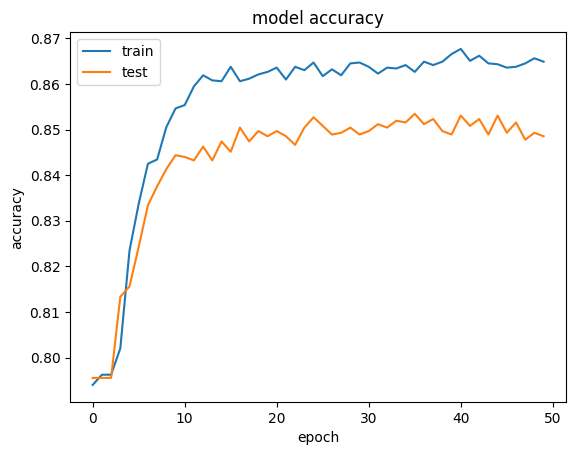

In [18]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

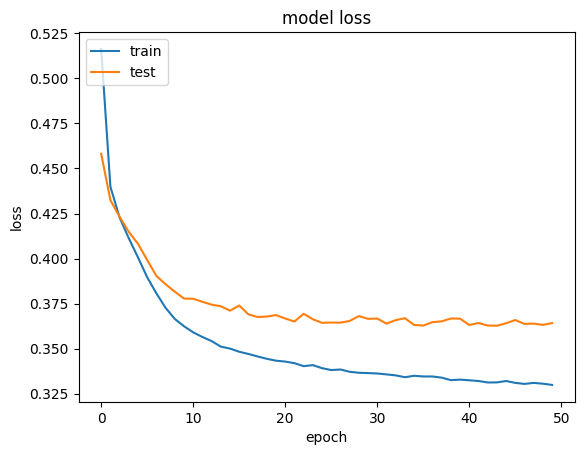

In [19]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1482,  113],
       [ 188,  217]])

In [22]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [23]:
score

0.8495